In [1]:

#Answer Question no 2 & 3



# Logistic Regression on Breast_canser Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve

In [2]:
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()
#print(df)   # Its a  dictionary style data 

In [3]:
from array import *

# Convering DataFrame to a list containg 
# all the rows of column 'Name'
dataset=df['data'].tolist()
#print(dataset)
targetset=df['target'].tolist()
#print(targetset)

DataTargetSet=list()
for row in range(len(dataset)):
    list1=dataset[row]
    list2=targetset[row]
    list1.insert(len(dataset[0]), list2)
    DataTargetSet.append(list1)
# print(DataTargetSet)
# print(len(DataTargetSet[0]))

In [4]:
#calculating ecah columns minumum and maximum value
def Get_Minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
minmax = Get_Minmax(dataset)
#print(minmax)

In [5]:
# Rescale dataset columns to the range 0-1
def Get_normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [6]:
def cross_valid_dataSplit(DataTargetSet, n_folds):
    dataset_split = list()
    dataset_copy = list(DataTargetSet)
    fold_size = int(len(DataTargetSet) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

#cross_valid_dataSplit(dataset, 1)

In [7]:
# Calculate accuracy percentage
def Get_accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [8]:
# Evaluating an algorithm using a cross validation split
def Get_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_valid_dataSplit(dataset, n_folds)
    #zzz=print(folds)    
    scores = list()
    predicted = list()
    probabilities = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        #dd=print(train_set)       
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted, probabilities = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = Get_accuracy_metric(actual, predicted)
        scores.append(accuracy)
        coef = coff_GD(train_set, l_rate, n_epoch)
        #probabilities = predict_prob(test_set,coef)
        predicted.append(predicted)         
        probabilities.append(probabilities)        
#print((predictions == Y_test).mean())        
        
    return scores,  predicted ,probabilities

In [9]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

In [10]:
# Finding logistic regression coefficients using gradient descent
def coff_GD(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef

In [11]:
# Logistic Regression Algorithm With Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
    predictions = list()
    probabilities = list()
    coef = coff_GD(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef) 
        probabilities.append(yhat)        
        yhat = round(yhat)
        predictions.append(yhat)
    return predictions, probabilities

In [12]:
# normalize
minmax = Get_Minmax(dataset)
Get_normalize_dataset(dataset, minmax)

In [13]:
# Getting main result
n_folds = 5
l_rate = 0.1
n_epoch = 100
scores,  predicted ,probabilities = Get_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
# print(predicted)
# print(probabilities)

Scores: [97.34513274336283, 97.34513274336283, 96.46017699115043, 99.11504424778761, 97.34513274336283]
Mean Accuracy: 97.522%


In [14]:
# Answer Question no. 4

In [15]:
# import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
# load and split data
data = load_breast_cancer()
X = data.data
Y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=18)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def roc_curve(y_true, y_score):
    # Sort the true labels and scores in descending order
    desc_score_indices = np.argsort(y_score)[::-1]
    y_true = y_true[desc_score_indices]
    y_score = y_score[desc_score_indices]

    # Compute the total number of positive and negative examples
    n_positive = np.sum(y_true == 1)
    n_negative = np.sum(y_true == 0)

    # Initialize arrays to store TPR and FPR values at each threshold
    tpr_values = np.zeros_like(y_true, dtype=np.float)
    fpr_values = np.zeros_like(y_true, dtype=np.float)

    # Iterate over different threshold values
    for i, threshold in enumerate(y_score):
        # Compute the number of true positives, true negatives, false positives, and false negatives at this threshold
        tp = np.sum((y_score >= threshold) & (y_true == 1))
        tn = np.sum((y_score < threshold) & (y_true == 0))
        fp = np.sum((y_score >= threshold) & (y_true == 0))
        fn = np.sum((y_score < threshold) & (y_true == 1))

        # Compute TPR and FPR at this threshold
        tpr = tp / n_positive
        fpr = fp / n_negative

        # Store TPR and FPR values
        tpr_values[i] = tpr
        fpr_values[i] = fpr

    # Plot the ROC curve
    plt.plot(fpr_values, tpr_values)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [17]:
def roc_curve_plot(predictions, probabilities):
    fpr, tpr, _ = roc_curve(predictions, probabilities)
    auc = roc_auc_score(predictions, probabilities)
    plt.plot(fpr, tpr, label='data, auc=' + str(auc))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [25]:
# logistic regression using sklearn library
model = LogisticRegression(C=0.1, max_iter=10000)
model.fit(X_train, Y_train)
sklearn_prediction = model.predict(X_test)
sklearn_probabilities = model.predict_proba(X_test)[::, 1]
probabilities_final = sklearn_probabilities
print((sklearn_prediction == Y_test).mean())



0.9414893617021277


In [26]:
# Implementation of ROC Curve algorithm manually

def roc_curve(y_true, y_prob):
    # Sort the true labels and predicted probabilities in descending order
    sorted_idx = np.argsort(y_prob)[::-1]
    y_true = y_true[sorted_idx]
    y_prob = y_prob[sorted_idx]

    # Count the number of positive and negative examples in the dataset
    num_pos = np.sum(y_true == 1)
    num_neg = np.sum(y_true == 0)

    # Initialize the true positive rate, false positive rate, and thresholds
    tpr = np.zeros(len(y_true) + 1)
    fpr = np.zeros(len(y_true) + 1)
    thresholds = np.zeros(len(y_true) + 1)

    # Calculate the TPR and FPR for each threshold value
    for i in range(len(y_true)):
        if i == 0:
            tpr[i] = 0
            fpr[i] = 0
        else:
            tp = np.sum(y_true[:i] == 1)
            fp = np.sum(y_true[:i] == 0)
            tpr[i] = tp / num_pos
            fpr[i] = fp / num_neg
            thresholds[i] = y_prob[i-1]

    tpr[len(y_true)] = 1
    fpr[len(y_true)] = 1
    thresholds[len(y_true)] = thresholds[len(y_true)-1]

    return tpr, fpr, thresholds


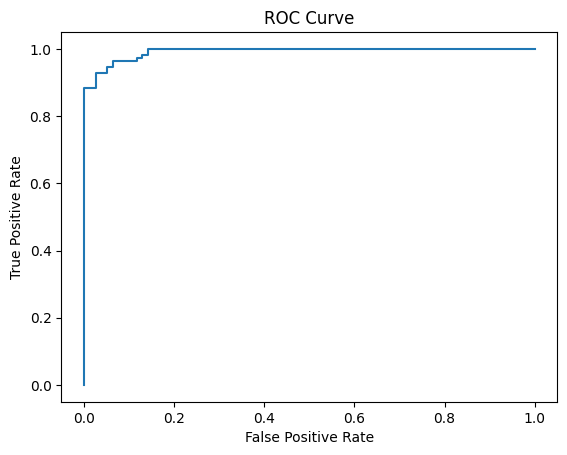

In [27]:
# Generate some sample data
y_true = Y_test
y_prob = probabilities_final

# Calculate the TPR, FPR, and thresholds
tpr, fpr, thresholds = roc_curve(y_true, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
